# Getting Started with Jupyter Notebooks

Jupyter Notebooks are great ways to display your code and/or data in a functional and understandable way. They allow you to combine "cells" of Markdown text (like this one) with sections of Python code, which can be evaluated within the notebook to generate printed outputs, plots, or simply to display the code you have written. These Notebooks are a great way to present your results to your collaborators, and to the scientific community at large. 

To get a feel for this new format, first create a Markdown Cell below this one. You can type something in it, and then press the "tick" button on the upper right-hand side, or press Shift + Enter, to evaluate the cell.

Test Markdown Cell 

Next, try to create a code cell. Click the "Add Code Cell" button, and write some simple code that will produce an output. For example, `print("Hello world!")`. You can evaluate this cell  by clicking the "play" button on the left-hand side, or by pressing Shift + Enter.

In [1]:
print("Hello world!")

Hello world!


Now that you know the basics of Jupyter Notebooks, you can complete the following exercise.

# Final Exercise

Now, we are going to put together everything we have learned over the last two days to analyze and plot some data about wild salmon. This data is in two files: 

1. `salmon_catch_data.csv`, contains data about salmon caught on a boat, including the common name, length (mm) and weight (g).
2. `salmon_mercury.csv`, contains yearly average mercury contents for several salmon species in ppm.

We are first going to deal with the length and weight data. In the cell below, import the data using [`numpy.genfromtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html)

Hint: Open the data file and see what it looks like (column names, data types, column order).

In [2]:
import numpy as np 

id, name, length, weight = np.genfromtxt('salmon_catch_data.csv', delimiter = ',', unpack = True, skip_header = True, dtype=None, encoding = None)

print(name)

['Chinook salmon' 'Sockeye salmon' 'Sockeye salmon' 'Steelhead'
 'Steelhead' 'Chinook salmon' 'Sockeye salmon' 'Steelhead' 'Steelhead'
 'Steelhead' 'Steelhead' 'Steelhead' 'Steelhead' 'Steelhead' 'Steelhead'
 'Steelhead' 'Steelhead' 'Steelhead' 'Steelhead' 'Steelhead' 'Steelhead'
 'Steelhead' 'Steelhead' 'Steelhead' 'Steelhead' 'Steelhead' 'Steelhead'
 'Steelhead' 'Steelhead' 'Steelhead' 'Steelhead' 'Chinook salmon'
 'Chinook salmon' 'Sockeye salmon' 'Chinook salmon' 'Chinook salmon'
 'Sockeye salmon' 'Steelhead' 'Steelhead' 'Steelhead' 'Steelhead'
 'Steelhead' 'Steelhead' 'Chinook salmon' 'Chinook salmon'
 'Chinook salmon' 'Chinook salmon' 'Chinook salmon' 'Chinook salmon'
 'Chinook salmon' 'Chinook salmon' 'Steelhead' 'Coho salmon' 'Coho salmon'
 'Chinook salmon' 'Chinook salmon' 'Chinook salmon' 'Chinook salmon'
 'Chinook salmon' 'Chinook salmon' 'Chinook salmon' 'Sockeye salmon'
 'Sockeye salmon' 'Sockeye salmon' 'Sockeye salmon' 'Sockeye salmon'
 'Steelhead' 'Chinook salmon' 'Stee

## Counting Salmon Species: Bar Plot

In this first exercise, we will be attempting to make a bar plot that looks something like this:

![Bar plot of numbers of various salmon species.](final_bar.png)

You will notice that this data includes a number of different sub-species of salmon. Use the `set` data type to find all of the unique values in the array of common names. Print this set to see the unique salmon names in this dataset - you should see 4 sub-species appear.

In [3]:
unique_names = set(name)
print(unique_names)

{'Coho salmon', 'Steelhead', 'Sockeye salmon', 'Chinook salmon'}


We want to make a bar plot of the quantities of salmon caught in each sub-species. In the code box below, write some code that counts the number of each sub-species.

Hint: There are several ways to do this. One way would be to initialize "counter" variables for each sub-species at 0, then use a for loop to iterate through the list of names and add to the appropriate counter in ever loop. A "slicker" way of doing this would be to use the [`count()`](https://docs.python.org/3/tutorial/datastructures.html) function - but note that this method applies to lists, not arrays.

Save these counts as a list of integers.

In [4]:
steelhead_count = list(name).count('Steelhead')
coho_count = list(name).count('Coho salmon')
chinook_count = list(name).count('Chinook salmon')
sockeye_count = list(name).count('Sockeye salmon')

print(steelhead_count, coho_count, chinook_count, sockeye_count)

count_list = [steelhead_count, coho_count, chinook_count, sockeye_count]

41 2 46 11


Let's make a bar plot of the count of each type of salmon. For this, we will use the [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) function from `matplotlib.pyplot`. First, let's generate the data we want to plot. The first will be a list of the names of salmon (as strings). On the vertical axis, we will use a list of the counts for each species, which we generated previously. Then, make your plot nice: add color, add a title, and add a vertical axis label.

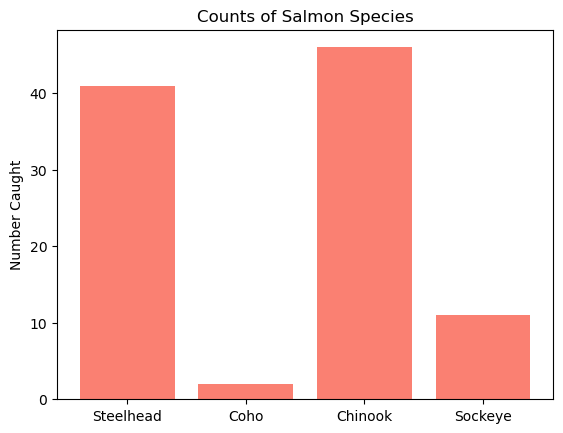

In [5]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.bar(['Steelhead', 'Coho', 'Chinook', 'Sockeye'],count_list, color = 'salmon')
ax1.set_title('Counts of Salmon Species')
ax1.set_ylabel('Number Caught')
plt.show()

## Length vs Weight: Scatter Plot

Next, we want to make a plot of length vs weight for our salmon. If you take a look at the data, you'll notice that weight data was only collected for a subset of the Chinook salmon caught. This is reflective of real-life scientific data: it may be messy and incomplete, but we can still extract some good information from it. In the end, we will make a plot that looks something like this:

![alt text](final_scatter.png)

We want to plot the data for the salmon which have both weight AND length data. The weight column of the dataset will have the value `nan` in cases where no weight was measured. Generate new lists for the data you want to plot, and use a for loop to extract the data and append it to your new lists. You can then print the contents of the lists to check if you have extracted the correct information.

Hint: the tricky part is figuring out how to separate the "nan" values from the numbers. You will note that the "nan" values are actually floats (you can check by printing their type). One way you can distinguish the real numerical values from the floats is by using the condition "> 0" applied to the elements of the list of weights.

In [6]:
chinook_length = []
chinook_weight = []

for i in range(len(length)):
    if weight[i] > 0:
        chinook_weight.append(weight[i])
        chinook_length.append(length[i])

print(chinook_length) 
print(chinook_weight)


[147, 444, 422, 173, 145, 150, 155, 192, 275, 137, 165, 147, 151, 142, 148, 145, 142, 155, 142]
[25.6, 1011.7, 902.4, 50.7, 26.6, 27.4, 32.2, 78.0, 268.7, 23.5, 43.0, 29.3, 28.4, 25.5, 24.4, 28.6, 20.7, 30.8, 23.1]


Now, we want to make a scatter plot of this reduced data using the [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) function. 

Remember to add a title and axis labels, and choose a fun color and marker shape!

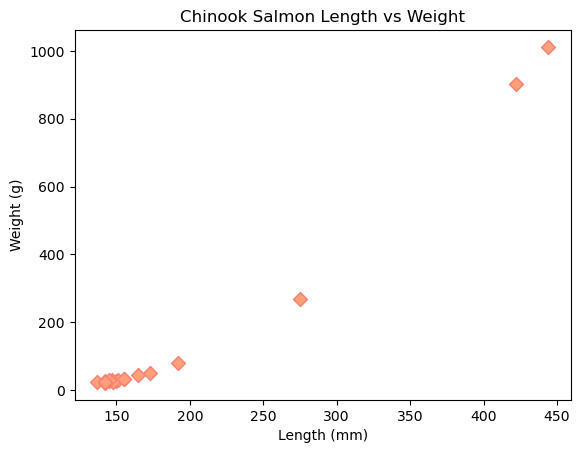

In [7]:
fig, ax = plt.subplots()
ax.scatter(chinook_length, chinook_weight, c = 'lightsalmon', edgecolor = 'salmon', s = 50, marker = 'D')
ax.set_title('Chinook Salmon Length vs Weight')
ax.set_xlabel('Length (mm)')
ax.set_ylabel('Weight (g)')
plt.show()

## Salmon Length Distributions: Violin Plot

Next, we want to look at the distributions of fish lengths in the separate salmon species. To do so, we will use the [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) function from `seaborn`.

The first thing to do is to prepare our data for plotting. We will need to isolate the length data for each species into a different list so that we can plot them individually. To do this, you can initialize empty lists for each salmon species. Then, using a for loop, sort each element of the list of salmon lengths into the appropriate species list. 

In [8]:
import seaborn as sns

steelhead = []
coho = []
chinook = []
sockeye = []

for i in range(len(name)):
    if name[i] == 'Steelhead':
        steelhead.append(length[i])
    elif name[i] == 'Coho salmon':
        coho.append(length[i])
    elif name[i] == 'Chinook salmon':
        chinook.append(length[i])
    else:
        sockeye.append(length[i])



Now that we have a list of lengths for each species, we can begin to make our plot. It should look something like this:

 ![alt text](final_violin_1.png)

 To generate the violin plots of each species in this way, we will need to make a "list of lists", i.e. `[steelhead_lengths, coho_lengths, chinook_lengths, sockeye_lengths]`, where each of these elements itself is a list of numbers. If we then use this list of lists as the input for `sns.violinplot()`, we can generate 4 violin plots evenly spaced along the x axis.

 Give this a try in the code cell below. Remember to specify an axis and color for your violin plot. 

 You can also re-label your x tick values to make them correspond to the salmon species names. To do this, use the [`ax.set_xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#) function. As an input, this function will accept a list of positions (use `[0, 1,2, 3]`) and a list of strings, which will be the corresponding tick labels.

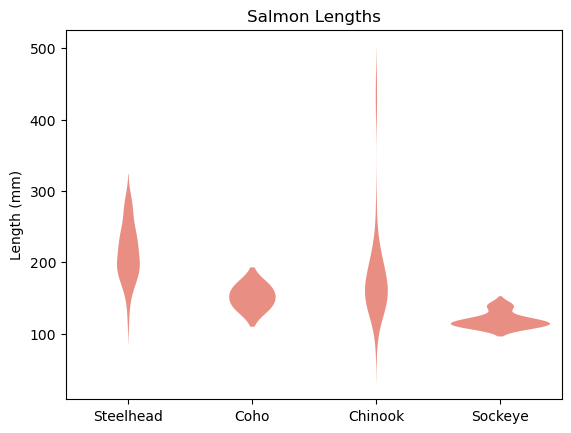

In [9]:
fig, ax1 = plt.subplots()

sns.violinplot([steelhead, coho, chinook, sockeye], ax = ax1, color = 'salmon', linewidth=0)

ax1.set_ylabel("Length (mm)")
ax1.set_title("Salmon Lengths")
ax1.set_xticks([0,1,2,3], labels=['Steelhead', 'Coho', 'Chinook', 'Sockeye'])
plt.show()

We can also plot our data on overlapping violin plots, as shown in the plot below:

![alt text](final_violin_2.png)

To do this, just repeat the `sns.violinplot()` function for each dataset individually. Specify a label for each instance, and then add a legend to your plot.

Hint: Adjust the `alpha` (transparency) value so that all datasets are visible.

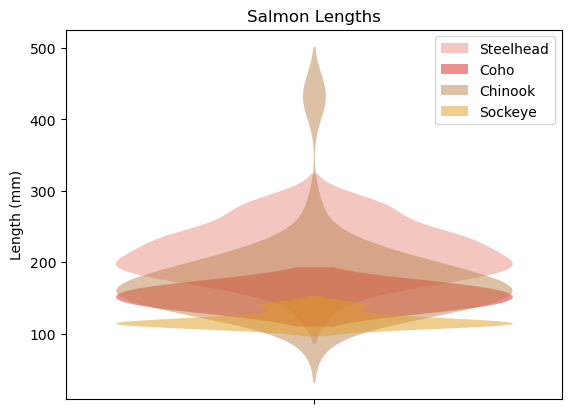

In [10]:
fig, ax1 = plt.subplots()

sns.violinplot(steelhead, ax = ax1, color = 'salmon', alpha = 0.5, linewidth=0, label = "Steelhead")
sns.violinplot(coho, ax = ax1, color = 'red', alpha = 0.5, linewidth=0, label = "Coho")
sns.violinplot(chinook, ax = ax1, color = 'peru', alpha = 0.5, linewidth=0, label = "Chinook")
sns.violinplot(sockeye, ax = ax1, color = 'orange', alpha = 0.5, linewidth=0, label = "Sockeye")

ax1.legend()
ax1.set_ylabel("Length (mm)")
ax1.set_title("Salmon Lengths")

plt.show()

## Salmon Mercury Levels: Heatmap Plot 

Lastly, we are going to use the data in the second data file, `salmon_mercury.csv`, to make a heatmap plot of the progression of salmon mercury levels over time. It should look something like this:

![alt text](final_heatmap.png)

First, take a look at the structure of the data file and compare it to the plot above. You will note that the previous way we have extracted data from tabular files has been by column. In this case, we want to extract the entire "table" as a matrix, or list of lists, which we will then use to generate our 2D heatmap.

Hint: you may want to use the `unpack`, `skip_header`, and `usecols` options in [`genfromtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) to your advantage.

In the cell below, extract three elements from the csv file:
- `data`, a 2D matrix with 5 columns and 4 rows containing the mercury levels
- `names`, a list of strings corresponding to the salmon names
- `years`, a list of the years in which the measurements were collected, but formatted as strings rather than integers (we will want to use these for axis labels)

Print these elements out to ensure you have extracted the right data before proceeding. They should look like this:

```
[[0.085 0.085 0.086 0.087 0.088]
 [0.084 0.08  0.082 0.084 0.084]
 [0.096 0.096 0.094 0.095 0.094]
 [0.072 0.07  0.075 0.077 0.078]]
['Chinook salmon' 'Sockeye salmon' 'Steelhead' 'Coho salmon']
['2002' '2006' '2010' '2014' '2018']
```

In [11]:
data = np.genfromtxt('salmon_mercury.csv', delimiter = ',', unpack = False, skip_header = True, usecols = [1,2,3,4,5])
names = np.genfromtxt('salmon_mercury.csv', delimiter = ',', unpack = True, skip_header = True, usecols = [0], dtype = str)
years = np.genfromtxt('salmon_mercury.csv', delimiter = ',', unpack = False, skip_header = False, dtype = str,)[0][1:]
print(data)
print(names)
print(years)

[[0.085 0.085 0.086 0.087 0.088]
 [0.084 0.08  0.082 0.084 0.084]
 [0.096 0.096 0.094 0.095 0.094]
 [0.072 0.07  0.075 0.077 0.078]]
['Chinook salmon' 'Sockeye salmon' 'Steelhead' 'Coho salmon']
['2002' '2006' '2010' '2014' '2018']


Next, we will make the heatmap plot using [`sns.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html). Be sure to set a colormap and add a title and axis labels.

You can also use the `ax.set_x(y)ticklabels()` function with the `name` and `year` lists to create useful tick labels.

Lastly, use `ax.tick_params(axis='y', labelrotation=0)` to make the y-axis tick labels horizontal for readability.

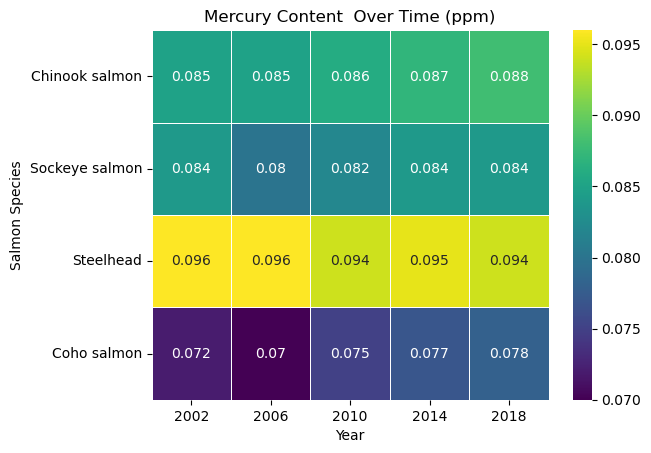

In [12]:
fig, ax = plt.subplots()
sns.heatmap(data, linewidth = 0.5, cmap = 'viridis', annot = True)
ax.set_xlabel("Year")
ax.set_ylabel("Salmon Species")
ax.set_title("Mercury Content  Over Time (ppm)")
ax.set_yticklabels(names)
ax.set_xticklabels(years)
ax.tick_params(axis='y', labelrotation=0)
plt.show()